# Week 3
## introduction to data analysis and SPD incident data

### Part 1 - Data import

In [6]:
import pandas as pd

data = pd.read_csv('data/SFPD_Incidents_-_from_1_January_2003.csv', sep=',')

# number of incidents
len(data)

1872651

In [7]:
data.keys()

Index([u'IncidntNum', u'Category', u'Descript', u'DayOfWeek', u'Date', u'Time',
       u'PdDistrict', u'Resolution', u'Address', u'X', u'Y', u'Location',
       u'PdId'],
      dtype='object')

Number of Categories = 39


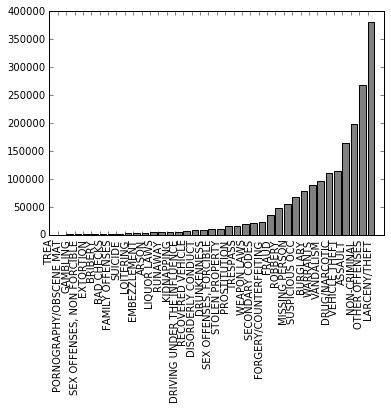

In [8]:
from collections import Counter
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np



cats = Counter(data['Category'])
print 'Number of Categories = %s' % (len(cats))
cats = cats.most_common()
y_pos = np.arange(len(cats))
plt.bar(y_pos, [cat[1] for cat in reversed(cats)], color='gray');
plt.xticks(y_pos, [cat[0] for cat in reversed(cats)],rotation=90);

### Temporal analysis

In [9]:
yeardata = Counter([date.split('/')[-1] for date in data['Date']])
yeardata

Counter({'2003': 149176,
         '2004': 148148,
         '2005': 142186,
         '2006': 137853,
         '2007': 137639,
         '2008': 141311,
         '2009': 139861,
         '2010': 133525,
         '2011': 132699,
         '2012': 140858,
         '2013': 152812,
         '2014': 150161,
         '2015': 154206,
         '2016': 12216})

Find mean crimes per year

In [10]:
sum([int(y[0])*y[1] for y in zip(yeardata.keys(), yeardata.values())])/float(sum([int(y) for y in yeardata.keys()]))

133733.17701631537

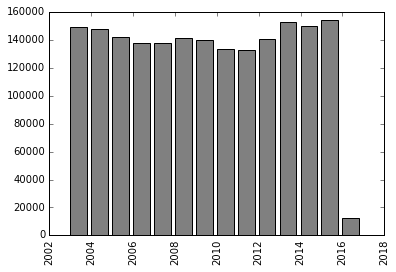

In [11]:
plt.bar([int(y) for y in yeardata.keys()], yeardata.values(), color='gray');
plt.xticks(rotation=90);

# Focus Crimes

In [12]:
focuscrimes = ('WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT')


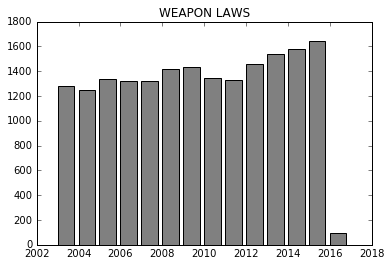

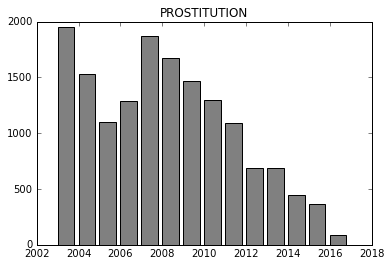

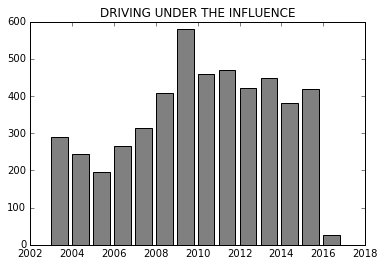

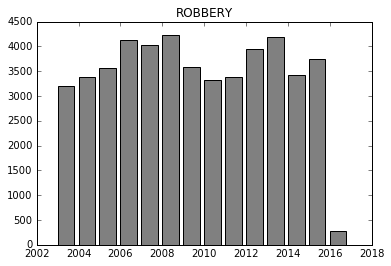

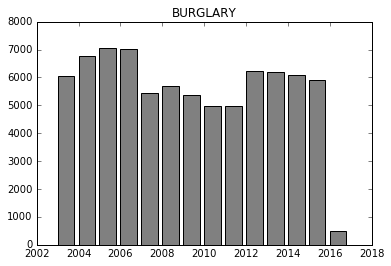

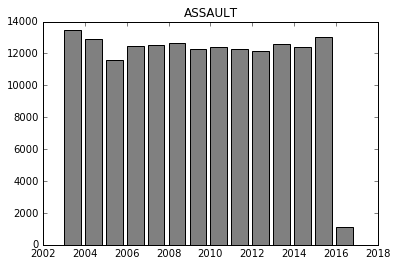

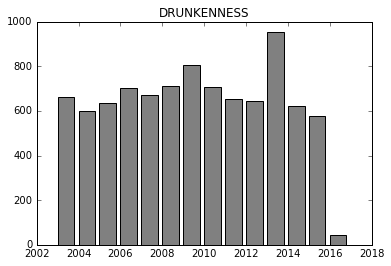

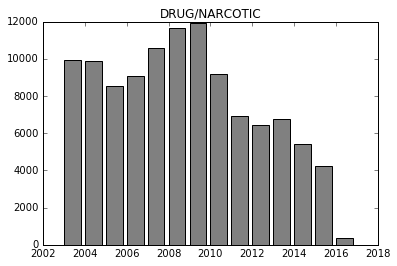

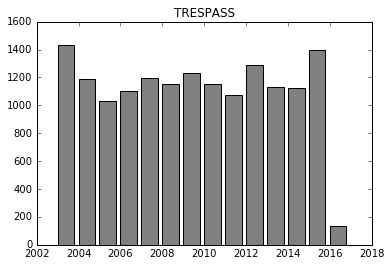

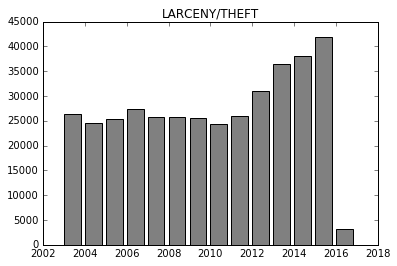

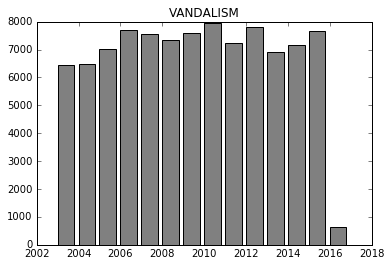

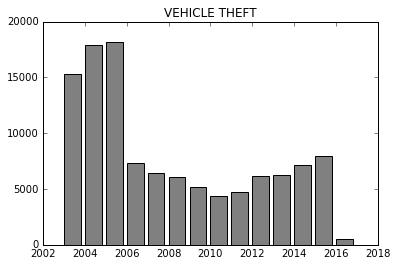

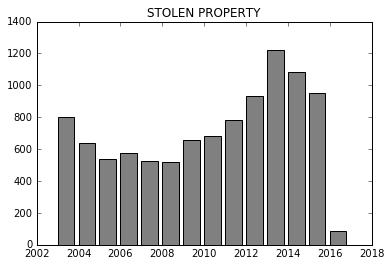

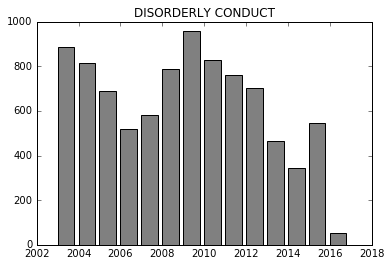

In [13]:
for i in range(len(focuscrimes)):
    d = data.loc[data['Category'] == focuscrimes[i]]
    yeardata = Counter([date.split('/')[-1] for date in d['Date']])
    plt.figure(i+1)
    plt.bar([int(y) for y in yeardata.keys()], yeardata.values(), color='gray');
    plt.title(focuscrimes[i])

* Vehicle theft takes a sudden drop in 2005 
* Falling prostitution and drug cases
* Increasing stolen property cases

This matches the stories of San Fransisco changing into a "more expensive" town

# Crimes in time

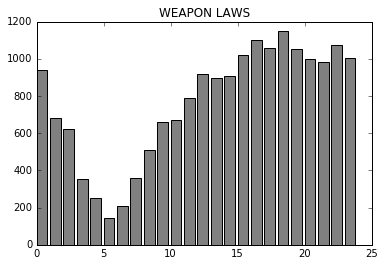

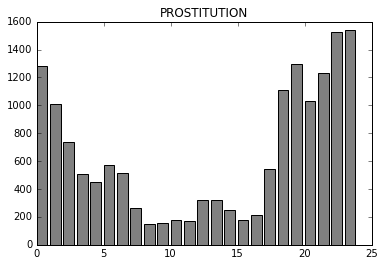

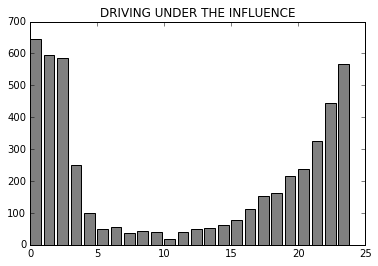

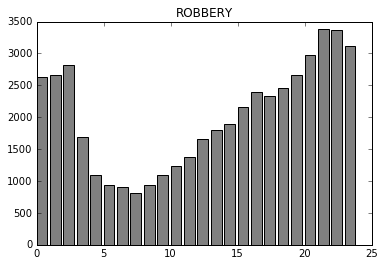

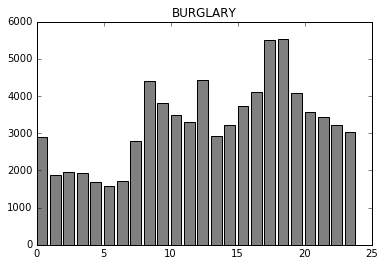

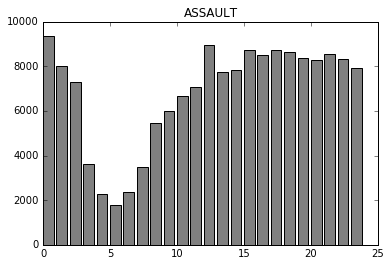

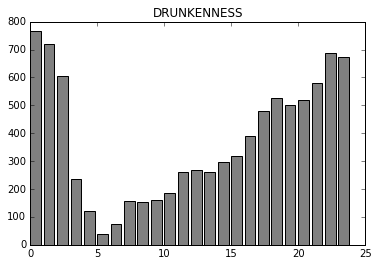

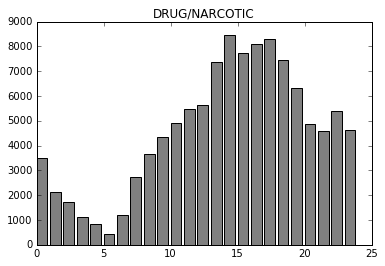

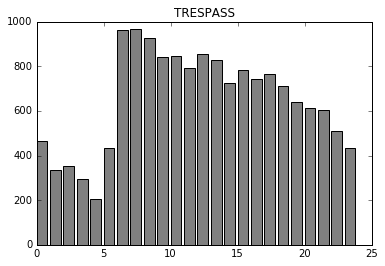

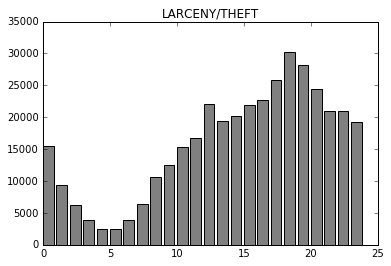

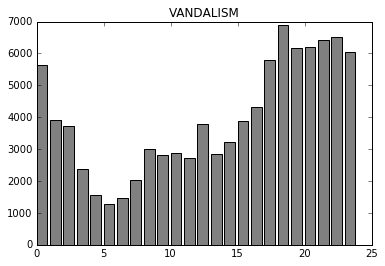

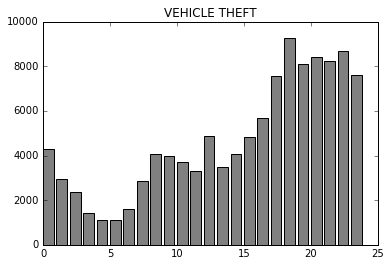

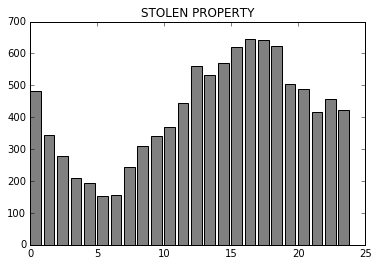

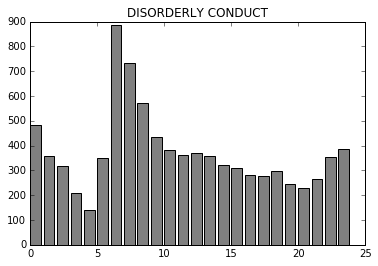

In [14]:
for i in range(len(focuscrimes)):
    d = data.loc[data['Category'] == focuscrimes[i]]
    hrdata = Counter([int(time.split(":")[0]) for time in d['Time']])
    plt.figure(i+1)
    plt.bar([int(hr) for hr in hrdata.keys()], hrdata.values(), color='gray');
    plt.title(focuscrimes[i])

# Crime across districts

In [15]:
# All crimes
Counter(data['PdDistrict']).most_common()

[('SOUTHERN', 335978),
 ('MISSION', 253378),
 ('NORTHERN', 226600),
 ('BAYVIEW', 189359),
 ('CENTRAL', 184686),
 ('TENDERLOIN', 170891),
 ('INGLESIDE', 168097),
 ('TARAVAL', 140757),
 ('PARK', 106392),
 ('RICHMOND', 96512),
 (nan, 1)]

The southern district has the most crime

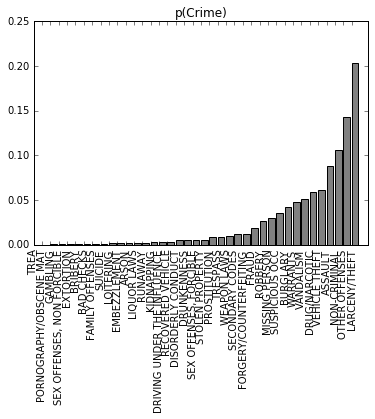

In [17]:
crimes = sum([c[1] for c in cats])
crimes
pCrime = zip([c[0] for c in cats], [c[1] / float(crimes) for c in cats]) 

y_pos = np.arange(len(cats))
plt.bar(y_pos, [cat[1] for cat in reversed(pCrime)], color='gray');
plt.xticks(y_pos, [cat[0] for cat in reversed(pCrime)],rotation=90);
plt.title('p(Crime)');

## p(Crime | District)

In [18]:
districts = list(set(data['PdDistrict']))[1:]
for i in range(len(districts)):
    d = data.loc[data['Category'] == focuscrimes[i]]
    print districts[i]
    

CENTRAL
NORTHERN
INGLESIDE
SOUTHERN
MISSION
TENDERLOIN
RICHMOND
TARAVAL
BAYVIEW
PARK


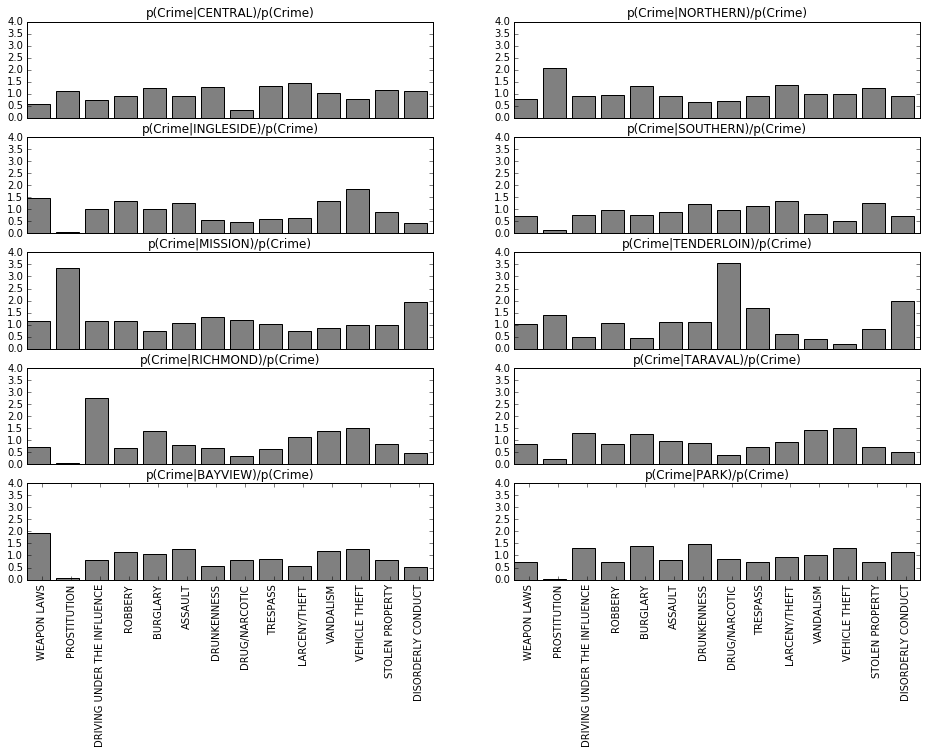

In [20]:
# Calculate crime rates for all districts
d = Counter(data.Category)
crimes = float(sum(d.values()))
#normalize by crimes
pCrime = {key:d[key]/crimes for key in d.keys()}

plt.figure(figsize=(16,10))
# Calculate crime rates for single districts
for i in range(len(districts)):
    # extract data
    d = Counter(data.loc[data.PdDistrict.isin({districts[i]})].Category)
    
    # total incidents
    crimes = float(sum(d.values()))
    
    # normalize by crimes
    pCrimeDistrict = {key:d[key]/crimes for key in d.keys()}

    # Normalize by the total rates
    normCrimeDistrict = {key:pCrimeDistrict[key]/pCrime[key] for key in pCrimeDistrict.keys()}
    
    # plot
    
    plt.subplot(len(districts)/2,2,i+1)
    y_pos = np.arange(len(focuscrimes))
    plt.bar(y_pos, [normCrimeDistrict[key] for key in focuscrimes], color='gray');
    if(i+1 > len(districts)-2):
        plt.xticks(y_pos+0.5, focuscrimes,rotation=90);
    else:
        plt.xticks([])
    
    plt.ylim(top=4)
    plt.title('p(Crime|%s)/p(Crime)' % districts[i]);


Looking at Tenderloin (drugs), Mission (prostitution), and Richmond (Driving under influence) at the web the same image of these hotspots are also revealed

It is important to include the non focus crimes in this statistic as it is the ratio of a single category to all crimes

# Part 3: Machine Learning


* What do we mean by a 'feature' in a machine learning model?  
A feature in machine learning is a quantitive measure
* What is the main problem with overfitting?  
An overfitted model tend predict the data it was trained more closely, and loosing generality. Therefore it will predict verification data worse than the training set.
* Explain the connection between the bias-variance trade-off and overfitting/underfitting.  
An underfitted model will often have a high bias, while an overfitted model will have a high variance
* The Luke is for leukemia is a great example of why accuracy is not a good measure in very unbalanced problems. You know about the incidents dataset we've been working with. Try to come up with a similar example based on the data we've been working with today. 
First a couple of definitions
given true positives tp, true negatives tn, false positives fp, false negatives fn


$$accuracy = \frac{tp+tn}{tp+tn+fp+fn}$$  
$$precision = \frac{tp}{tp+fp}$$  
$$recall = \frac{tp}{tp+fn}$$  
$$F1 score = \frac{2 \cdot precision \cdot recall}{precision + recall}$$  


Accuracy can be skewed by an unbalanced problem by a large number of true negatives
For information retrieval precisien and recall along with the harmonic mean of these is often a good measure

# Part 4, a bit of plotting

geoplotting with  with geoplotlib


In [21]:
import geoplotlib
from geoplotlib.utils import BoundingBox

mask = (data.Y != 90)# & (data.Category == 'DRUG/NARCOTIC')

geodata = {"lat": data.loc[mask].Y.tolist(),
                         "lon": data.loc[mask].X.tolist()}
geoplotlib.kde(geodata, bw=5, cut_below=1e-2);

mask = (data.Y != 90) & (data.Category == 'DRUG/NARCOTIC')

geodata = {"lat": data.loc[mask].Y.tolist(),
                         "lon": data.loc[mask].X.tolist()}
geoplotlib.kde(geodata, bw=5, cut_below=1e-2, cmap='Blues_r');

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();
#geoplotlib.show()

('smallest non-zero count', 3.5823932721920228e-09)
('max count:', 386.00174277466243)
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 101.94473147756155)


Bright spot close to the market, is the justice hall

In [22]:
mask = (data.Y != 90) & (data.Category == 'DRIVING UNDER THE INFLUENCE')
geodata = {"lat": data.loc[mask].Y.tolist(),
                         "lon": data.loc[mask].X.tolist()}
geoplotlib.kde(geodata, bw=5, cut_below=1e-2, cmap='Greens',alpha = 200);

mask = (data.Y != 90) & (data.Category == 'PROSTITUTION')
geodata = {"lat": data.loc[mask].Y.tolist(),
                         "lon": data.loc[mask].X.tolist()}
geoplotlib.kde(geodata, bw=5, cut_below=1e-2, cmap='Reds',alpha = 200);


mask = (data.Y != 90) & (data.Category == 'DRUG/NARCOTIC')
geodata = {"lat": data.loc[mask].Y.tolist(),
                         "lon": data.loc[mask].X.tolist()}
geoplotlib.kde(geodata, bw=5, cut_below=1e-2, cmap='Blues',alpha = 200);




geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();

('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 0.71292404868788073)
('smallest non-zero count', 1.4329573088768091e-09)
('max count:', 17.065636267483391)
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 101.94473147756155)


In [221]:
import heapq

def vector_subtract(x,y):  
    return [xn-yn for (xn,yn) in zip(x,y)]

def vector_dot(x,y):
    return sum([xn*yn for (xn,yn) in zip(x,y)])

def distance(x,y):
    v = vector_subtract(x,y)
    return np.sqrt(vector_dot(v,v))

def knn_classify(k, labelled_points, point):
    #closest = heapq.nsmallest(k, labelled_points, key=lambda (labelpoint, _) : distance(labelpoint, point))
    #k_nearest_labels = Counter([label for _,label in closest])
    by_distance = sorted(labelled_points, key=lambda (labelpoint, _) : distance(labelpoint, point))
    k_nearest_labels = Counter([label for _,label in by_distance[:k]])
    return k_nearest_labels.most_common()[0][0]
    
mask = (data.Y != 90) & (data.Category.isin({'DRUG/NARCOTIC','DRIVING UNDER THE INFLUENCE', 'PROSTITUTION'}))
knndata = random.sample(zip(zip(data.loc[mask].Y.tolist(),
           data.loc[mask].X.tolist()),
           data.loc[mask].Category.tolist()),5000)
    
latGrid = np.linspace(min(geodata['lat']), max(geodata['lat']), 50)
lonGrid = np.linspace(min(geodata['lon']), max(geodata['lon']), 50)
gridCategories = {'lat':[],'lon':[],'Category':[]}
gridCategories.keys()
i = 1
for lat in latGrid:
    for lon in lonGrid:
        gridCategories['lat'].append(lat)
        gridCategories['lon'].append(lon)
        gridCategories['Category'].append(knn_classify(5, knndata, (lat,lon)))
        if(i%500==0):
            print i
        i += 1

500
1000
1500
2000
2500


In [222]:
d = dict()
d['lat'] = [x for x,s
  in zip(gridCategories['lat'], gridCategories['Category'])
  if s == 'DRUG/NARCOTIC']
d['lon'] = [x for x,s
  in zip(gridCategories['lon'], gridCategories['Category'])
  if s == 'DRUG/NARCOTIC']
geoplotlib.dot(d, color='r');

d2 = dict()
d2['lat'] = [x for x,s
  in zip(gridCategories['lat'], gridCategories['Category'])
  if s == 'DRIVING UNDER THE INFLUENCE']
d2['lon'] = [x for x,s
  in zip(gridCategories['lon'], gridCategories['Category'])
  if s == 'DRIVING UNDER THE INFLUENCE']
geoplotlib.dot(d2, color ='g');

d3 = dict()
d3['lat'] = [x for x,s
  in zip(gridCategories['lat'], gridCategories['Category'])
  if s == 'PROSTITUTION']
d3['lon'] = [x for x,s
  in zip(gridCategories['lon'], gridCategories['Category'])
  if s == 'PROSTITUTION']
geoplotlib.dot(d3, color ='b', point_size=2);

geoplotlib.tiles_provider('toner-lite');
#geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();

In [220]:
heapq.nsmallest(5, knndata, key=lambda (labelpoint, _) : distance(labelpoint, (lat,lon)))

[((37.791951043964602, -122.393228290724), 'DRUG/NARCOTIC'),
 ((37.794959803128002, -122.400922761049), 'DRUG/NARCOTIC'),
 ((37.7846117680538, -122.391012478783), 'DRUG/NARCOTIC'),
 ((37.798222643742704, -122.40386454197599), 'DRIVING UNDER THE INFLUENCE'),
 ((37.798018068774397, -122.40547592923099), 'DRUG/NARCOTIC')]